In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
import cv2

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [ ]:
x_train = list(x_train)
for idx, image in enumerate(x_train, 0):
  x_train[idx] = cv2.resize(image, (75,75))
x_train = np.asarray(x_train)

x_test = list(x_test)
for idx, image in enumerate(x_test, 0):
  x_test[idx] = cv2.resize(image, (75,75))
x_test = np.asarray(x_test)

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 75, 75) y_train shape: (60000,)


y = 3 Dress


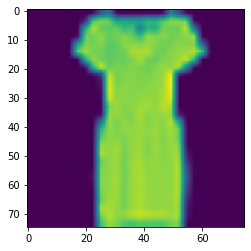

In [ ]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 20
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 75,75
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (50000, 75, 75, 1) y_train shape: (50000, 10)
50000 train set
5000 validation set
10000 test set


In [ ]:
base_model = tf.keras.applications.InceptionV3(weights=None, 
                                include_top=False, 
                                input_shape=x_train[0].shape)
base_model.trainable = False

add_model = tf.keras.Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(tf.keras.layers.Dense(2048, activation='tanh'))
add_model.add(tf.keras.layers.Dense(1000, activation='tanh'))
add_model.add(Dense(10, 
                    activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802208  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_25 (Dense)             (None, 1000)              2049000   
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10010     
Total params: 28,057,570
Trainable params: 6,255,362
Non-trainable params: 21,802,208
_________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 459s 528ms/step - loss: 1.9523 - accuracy: 0.2406 - val_loss: 1.0917 - val_accuracy: 0.5796

Epoch 00001: val_loss improved from inf to 1.09170, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 449s 522ms/step - loss: 1.2171 - accuracy: 0.5151 - val_loss: 0.9220 - val_accuracy: 0.6500

Epoch 00002: val_loss improved from 1.09170 to 0.92204, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 448s 521ms/step - loss: 1.1119 - accuracy: 0.5660 - val_loss: 0.8859 - val_accuracy: 0.6760

Epoch 00003: val_loss improved from 0.92204 to 0.88587, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 446s 519ms/step - loss: 1.0584 - accuracy: 0.5889 - val_loss: 0.8693 - val_accuracy: 0.6718

Epoch 00004: val_loss improved from 0.88587 to 0.86932, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============

In [ ]:
base_model = tf.keras.applications.InceptionV3(weights=None, 
                                include_top=False, 
                                input_shape=x_train[0].shape)
base_model.trainable = False

add_model = tf.keras.Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(tf.keras.layers.Dense(2048, activation='tanh'))
add_model.add(tf.keras.layers.Dense(1000, activation='tanh'))
add_model.add(tf.keras.layers.Dense(512, activation='tanh'))
add_model.add(tf.keras.layers.Dense(240, activation='tanh'))
add_model.add(tf.keras.layers.Dense(120, activation='tanh'))
add_model.add(tf.keras.layers.Dense(84, activation='tanh'))
add_model.add(Dense(10, 
                    activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802208  
_________________________________________________________________
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              2049000   
_________________________________________________________________
dense_29 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_30 (Dense)             (None, 240)             

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])